In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

import selfies as sf
import pickle
import os

# data file name for BBB dataset with categorical data
bbb_fpath = "../B3DB/B3DB_classification_extended.tsv.gz"
# load data
df = pd.read_csv(bbb_fpath, sep="\t", compression="gzip")

np.random.seed(42)
random_inds = np.random.choice(df.logBB[(df.logBB.notna()) & (df['BBB+/BBB-'] == 'BBB-')].index.values,
                               size=100)[:10]

all_smile = df.SMILES
test_smiles = df.SMILES[(df.logBB.notna()) & (df['BBB+/BBB-'] == 'BBB-')].iloc[random_inds].tolist()
    
    
smiles = df.SMILES.to_list()
selfies = [sf.encoder(smile) for smile in smiles]
alphabet = sf.get_alphabet_from_selfies(selfies)
alphabet.add("[nop]")  # [nop] is a special padding symbol
alphabet = list(sorted(alphabet)) 

pad_to_len = max(sf.len_selfies(s) for s in selfies)  # 5
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


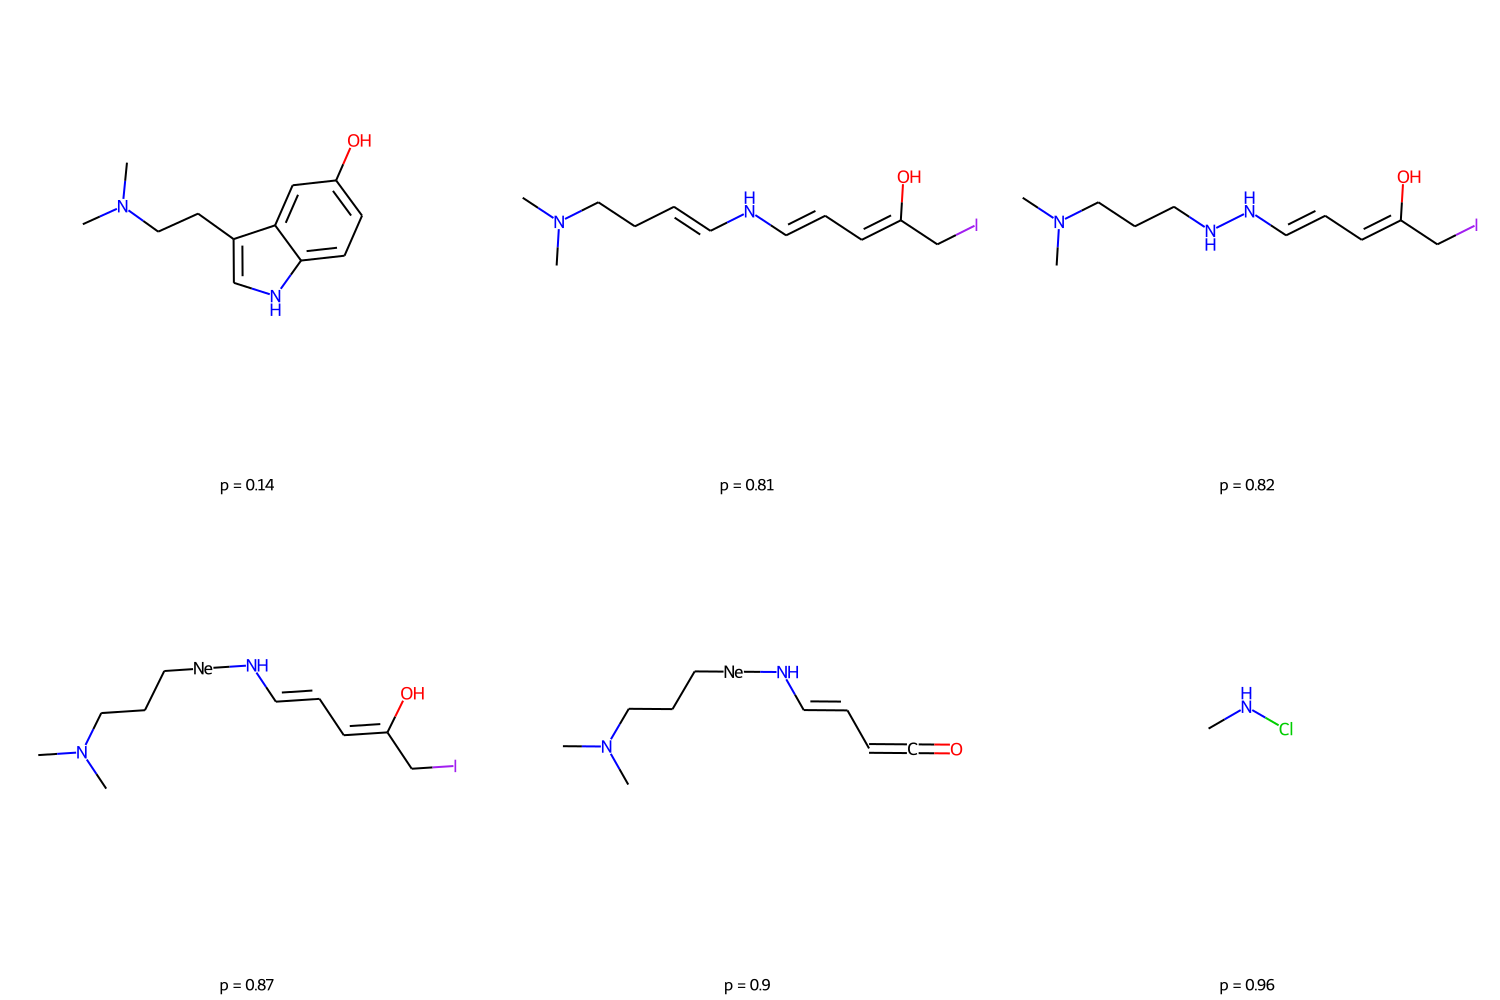

In [111]:
def get_smile(flattened_one_hot, n_genes=235):
    one_hot = flattened_one_hot.reshape(n_genes, -1)
    alphabet_arr = np.array(alphabet)
    label = np.where(np.array(one_hot) == 1)[1]
    reconstracted_selfie = alphabet_arr[label]
    merged_selfie = ''.join(alphabet_arr[label][np.where(alphabet_arr[label] != '[nop]')].tolist())

    decoded_smile = sf.decoder(merged_selfie)
    return decoded_smile


def plot_mols(history):
    evolution = []
    max_predictions = []
    for i in range(len(history)):
        sample = history[i]
        max_pred_arg = np.argmax(sample[1])
        best_pred = str(sample[1][max_pred_arg])

        if best_pred not in max_predictions:
            mol = Chem.MolFromSmiles(get_smile(sample[0][max_pred_arg]))
            evolution.append(mol)
            max_predictions.append(str(sample[1][max_pred_arg]))
    
    return evolution, max_predictions
    

histories = []
for file in os.listdir('./'):
    if '.pickle' in file and "new" in file:
        with open('./'+file, 'rb') as f:
            history = pickle.load(f)
        histories.append(history)
    else:
        continue

evolution, max_predictions = plot_mols(histories[29])
max_predictions = [f"p = {np.round(float(elem), 2)}" for elem in max_predictions]
img = Draw.MolsToGridImage(evolution, molsPerRow=3, subImgSize=(500, 500), legends=max_predictions)
img
# img.save("Mol_1.png")
# img.save("Mol_1.png", dpi=500)

In [26]:
png = img.data

In [27]:
type(png)

bytes

In [28]:
with open('./mols.png','wb+') as outf:
    outf.write(png)

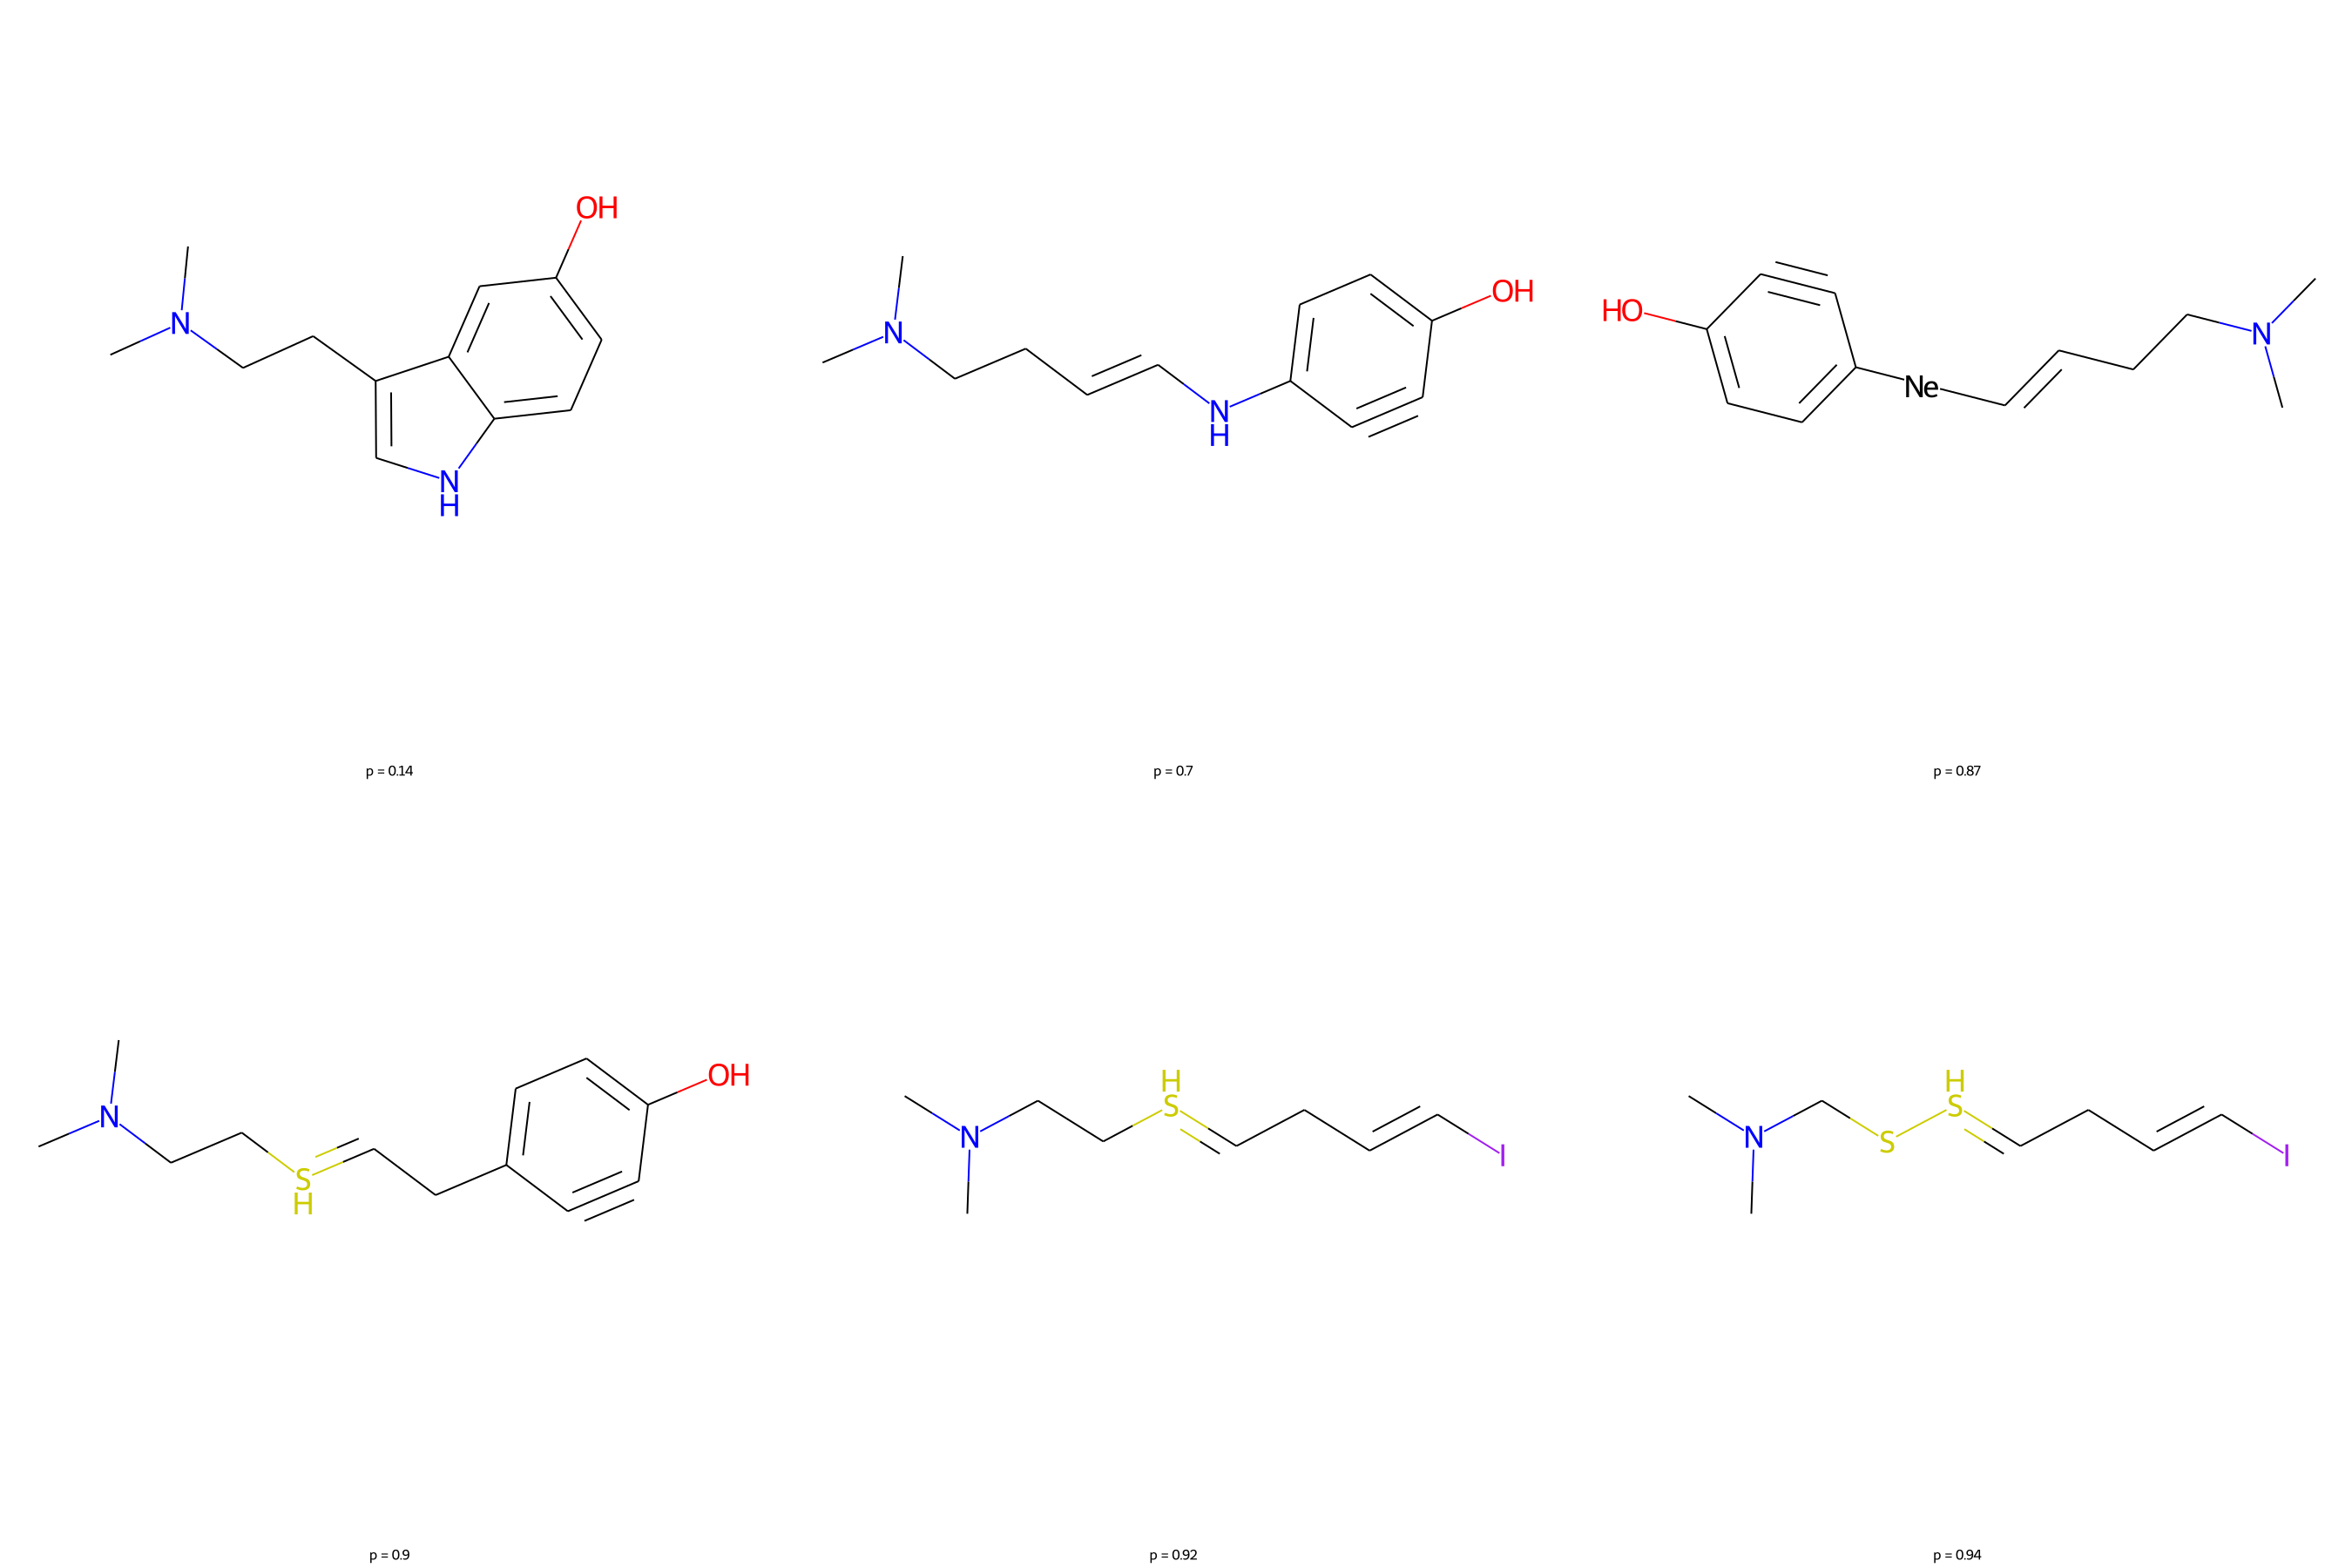

In [114]:
def get_smile(flattened_one_hot, n_genes=235):
    one_hot = flattened_one_hot.reshape(n_genes, -1)
    alphabet_arr = np.array(alphabet)
    label = np.where(np.array(one_hot) == 1)[1]
    reconstracted_selfie = alphabet_arr[label]
    merged_selfie = ''.join(alphabet_arr[label][np.where(alphabet_arr[label] != '[nop]')].tolist())

    decoded_smile = sf.decoder(merged_selfie)
    return decoded_smile


def plot_mols(history):
    evolution = []
    max_predictions = []
    for i in range(len(history)):
        sample = history[i]
        max_pred_arg = np.argmax(sample[1])
        best_pred = str(sample[1][max_pred_arg])

        if best_pred not in max_predictions:
            mol = Chem.MolFromSmiles(get_smile(sample[0][max_pred_arg]))
            evolution.append(mol)
            max_predictions.append(str(sample[1][max_pred_arg]))
    
    return evolution, max_predictions
    

histories = []
for file in os.listdir('results/'):
    if '.pickle' in file:
        with open('results/'+file, 'rb') as f:
            history = pickle.load(f)
        histories.append(history)
    else:
        continue

evolution, max_predictions = plot_mols(histories[1])
max_predictions = [f"p = {np.round(float(elem), 2)}" for elem in max_predictions]
img = Draw.MolsToGridImage(evolution, molsPerRow=3, subImgSize=(900, 900),  legends=max_predictions)
# img.save("Mol_1.png")
# png = img.data
img